In [1]:
import matplotlib.pyplot as plt
import numpy as np
from util.util import get_coins
from scipy.stats import beta, bernoulli

%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Bernoulli


In [2]:
# the first four draws from a coin
coins = get_coins(1)

In [3]:
mu_ml=np.sum(coins)/len(coins)
print(mu_ml)

0.75


In [5]:
def plot_beta(a,b):
    plt.figure()
    mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
    x = np.linspace(0,1,100)
    plt.plot(x, beta.pdf(x, a, b),'r-', lw=2, alpha=0.7, label='beta pdf')
    plt.show()
    return mean, var, skew, kurt

<IPython.core.display.Javascript object>


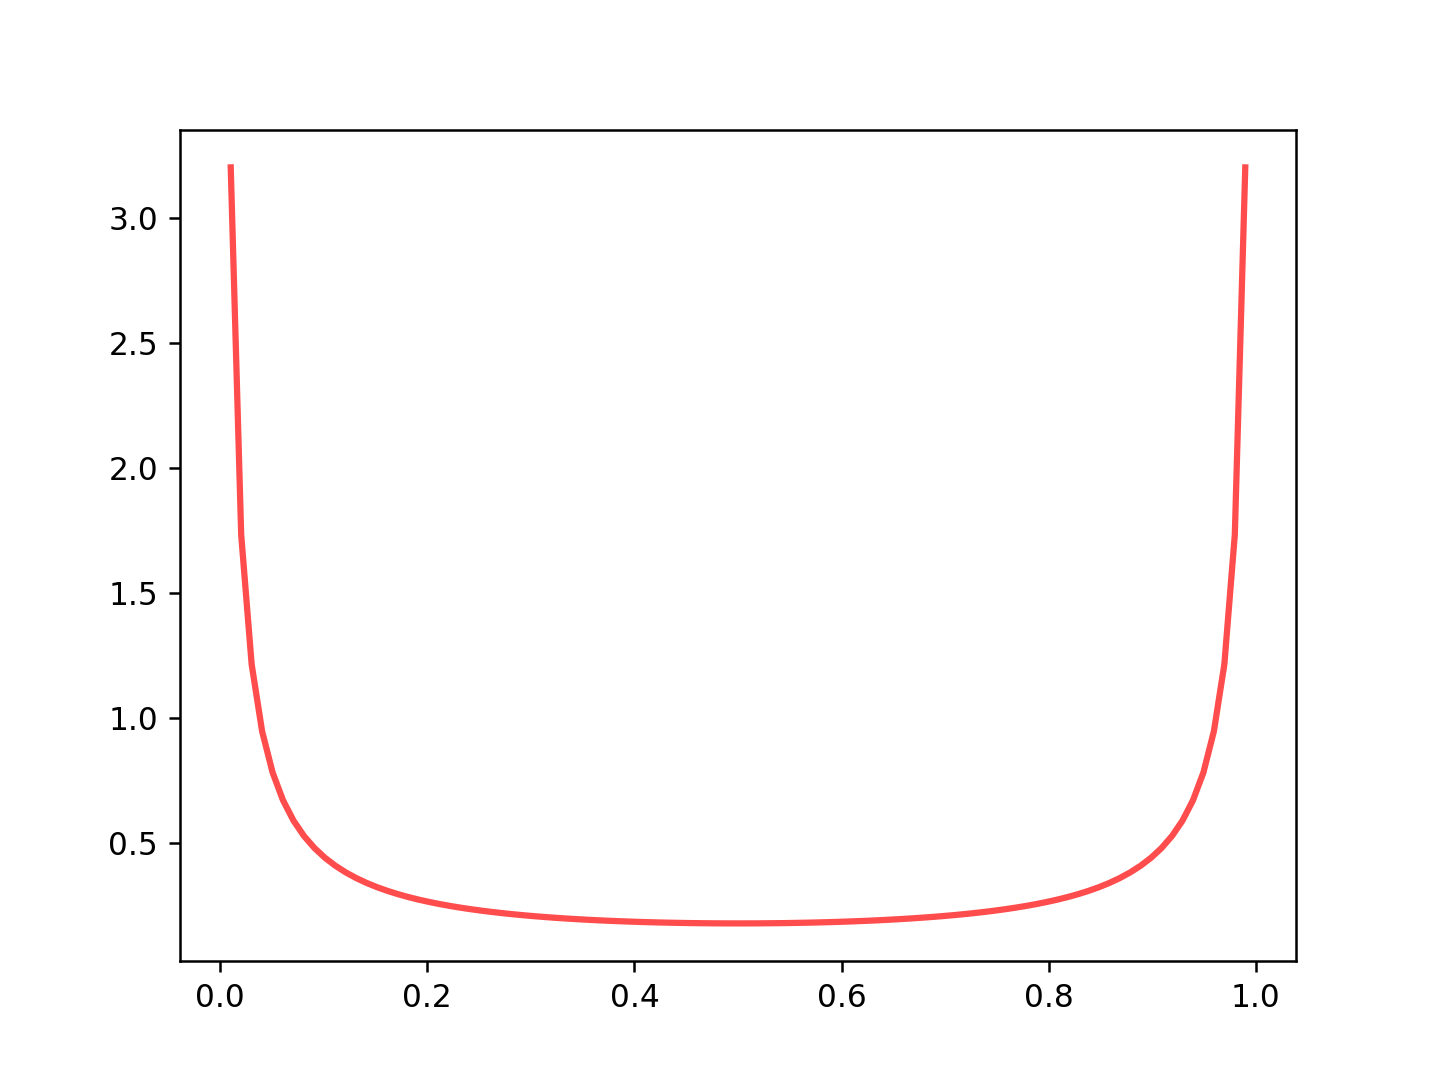

(array(0.5), array(0.20833333), array(0.), array(-1.875))

In [6]:
plot_beta(0.1,0.1)

In [ ]:
plot_beta(50,50)

In [8]:
def beta_update(a,b,x):

    a1=a+np.sum(x)
    b1=b+len(x)-np.sum(x)
    return a1, b1

<IPython.core.display.Javascript object>


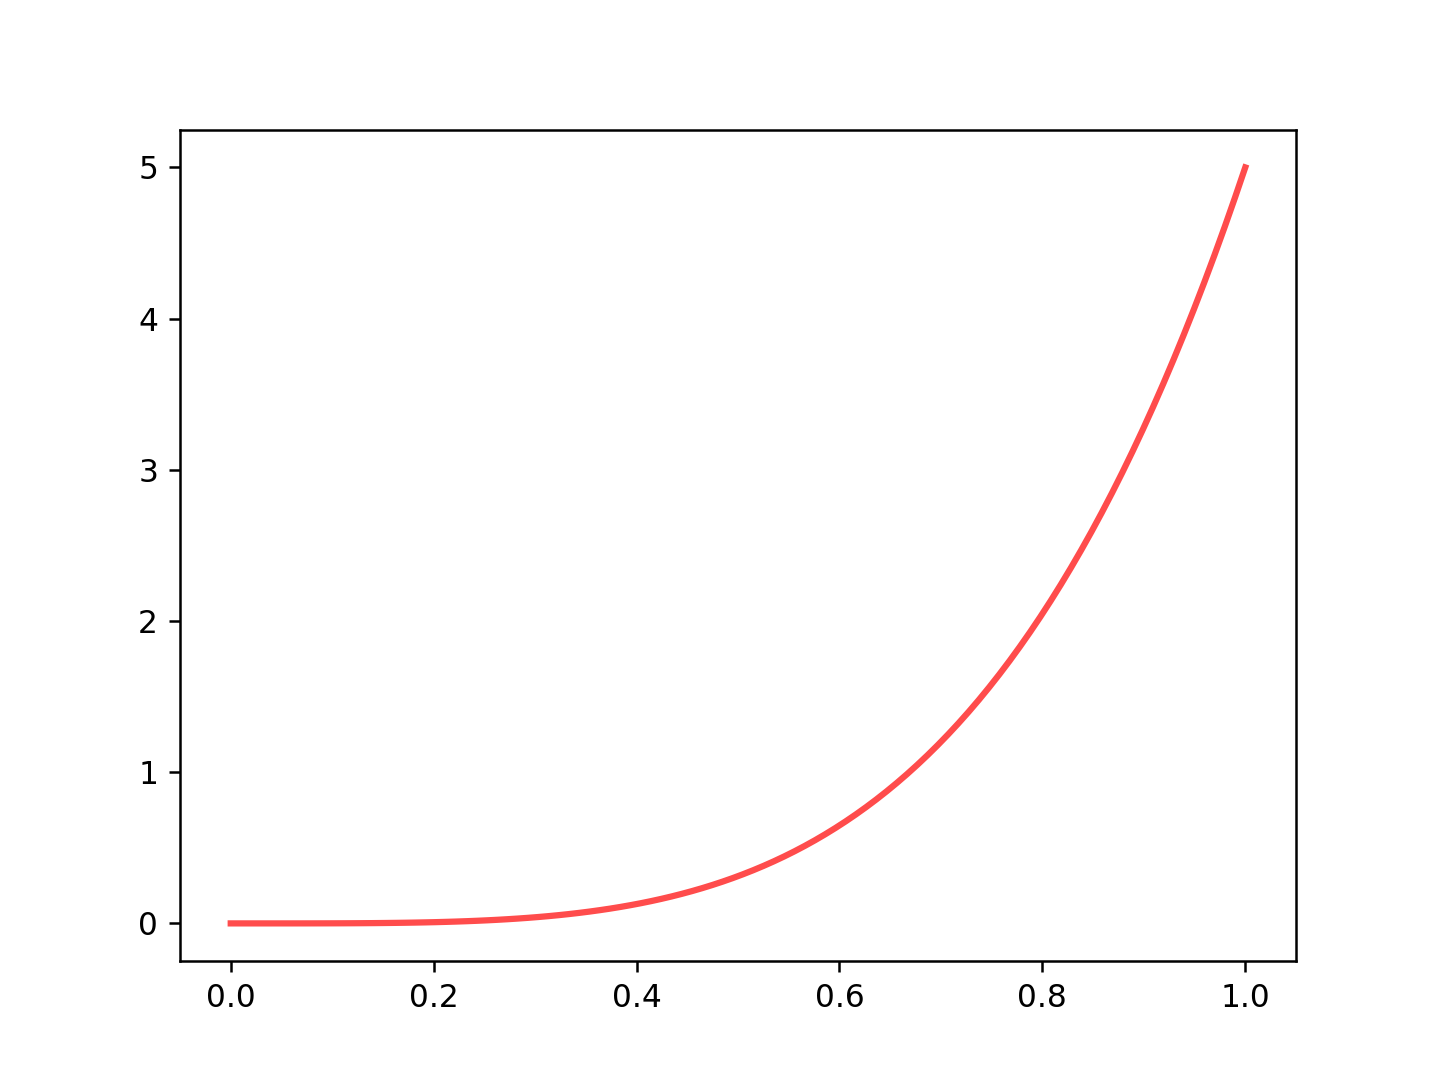

<IPython.core.display.Javascript object>


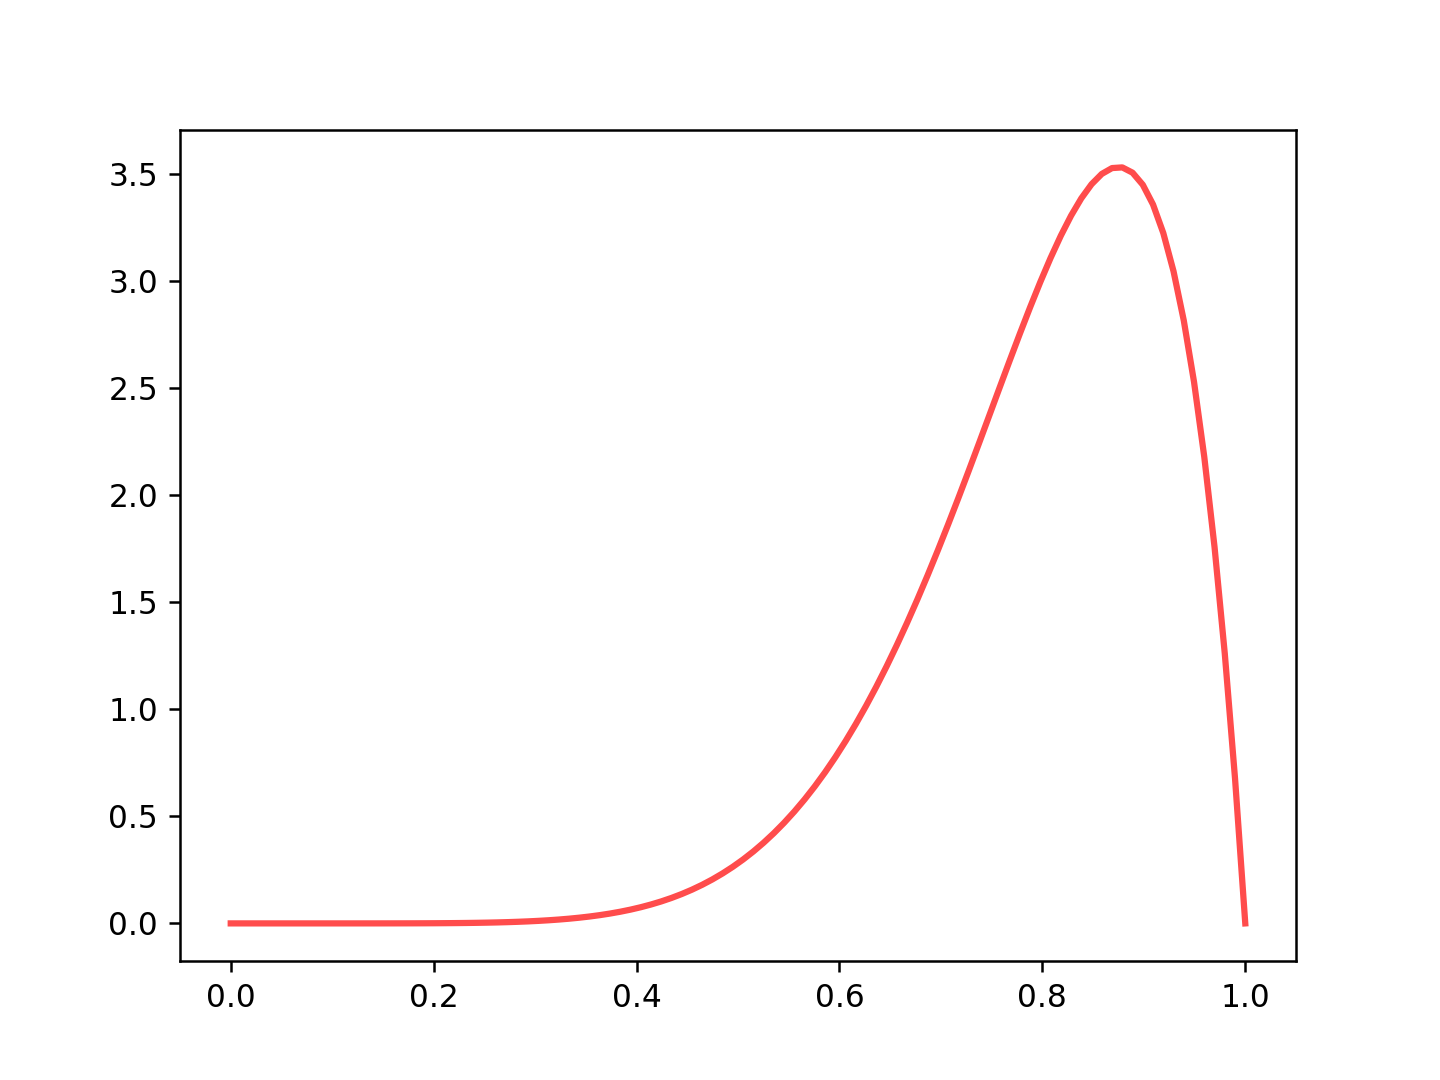

(array(0.8), array(0.01454545), array(-0.8291562), array(0.49038462))

In [10]:
a=5
b=1
plot_beta(a,b)
a1,b1=beta_update(a,b,coins)
plot_beta(a1,b1)

In [12]:
def MAP(a,b):
    E_mu=a/(a+b)
    return E_mu
MAP(a1,b1)

0.8

In [13]:
coins2 = get_coins(2)

<IPython.core.display.Javascript object>


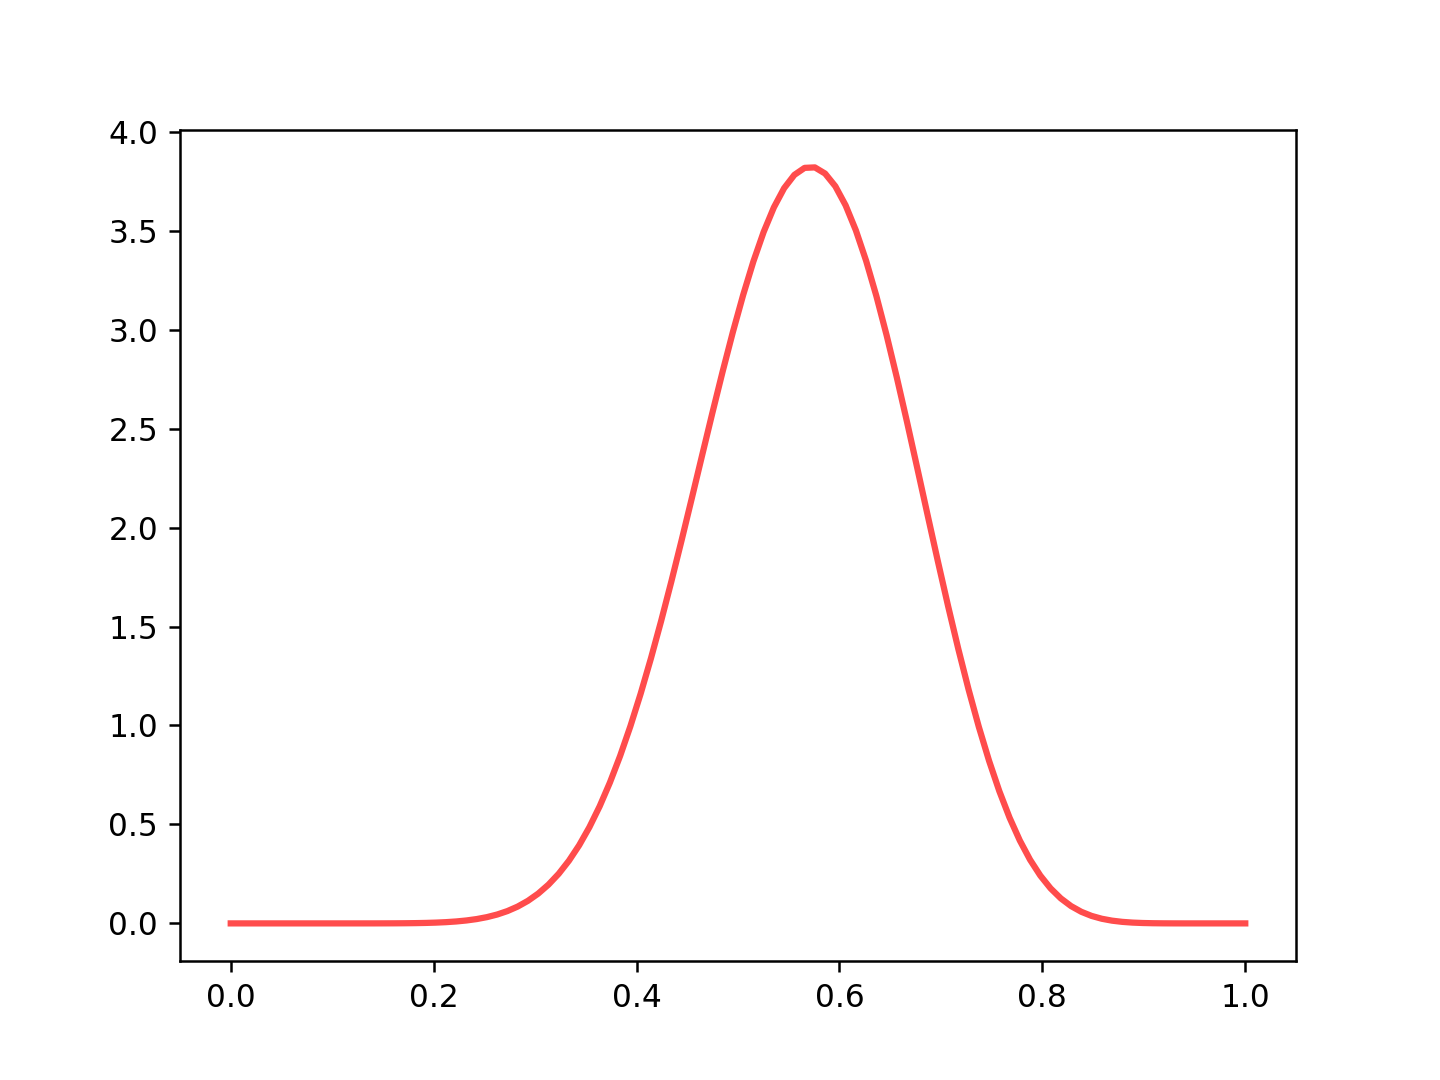

(array(0.56521739), array(0.01023945), array(-0.10312054), array(-0.21543195))

In [15]:
a2,b2=beta_update(a1,b1,coins2)
plot_beta(a2,b2)

In [16]:
coins3 = get_coins(3)

<IPython.core.display.Javascript object>


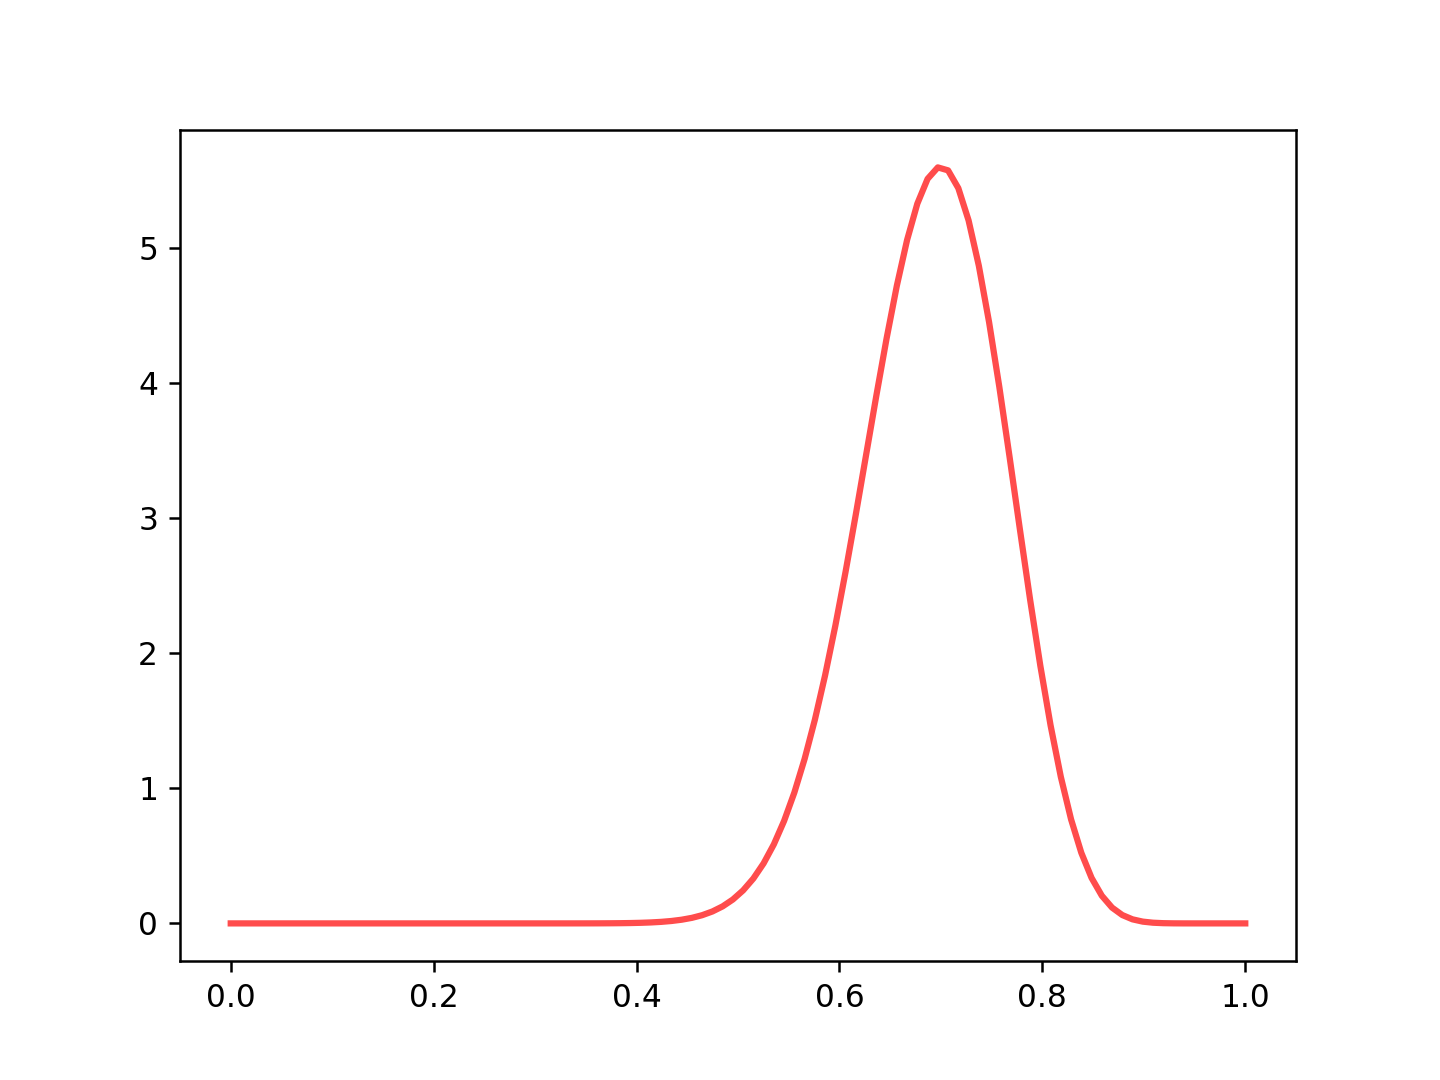

(array(0.69047619), array(0.00497021), array(-0.24561838), array(-0.0448517))

In [18]:
a3,b3=beta_update(a2,b2,coins3)
plot_beta(a3,b3)

In [20]:
def var_beta(a, b):
    var_b=(a*b)/((a+b)**2*(a+b+1))
    return var_b

var_beta(a3,b3)

0.004970205136318093

In [22]:
# concat different vectors to one big vector
allcoins = np.hstack((coins,coins2,coins3))

print("MAP updated Beta Distribution: ",MAP(a3,b3))
print("ML-mu: ",(np.sum(allcoins)/len(allcoins)))

MAP updated Beta Distribution:  0.6904761904761905
ML-mu:  0.6666666666666666


# Likelihood

In [24]:
def bern_lh(mu, x):
    p=1
    for n in np.arange(len(x)):
        p=p*mu**x[n]*(1-mu)**(1-x[n])
    return p

In [25]:
def plot_bern_mu(x):
    mu=np.arange(0,1,0.01)
    p=np.zeros(len(mu));
    for i in np.arange(len(mu)):
        p[i]=bern_lh(mu[i], x)
        
    plt.figure()
    plt.plot(mu,p)
    return mu, p

<IPython.core.display.Javascript object>


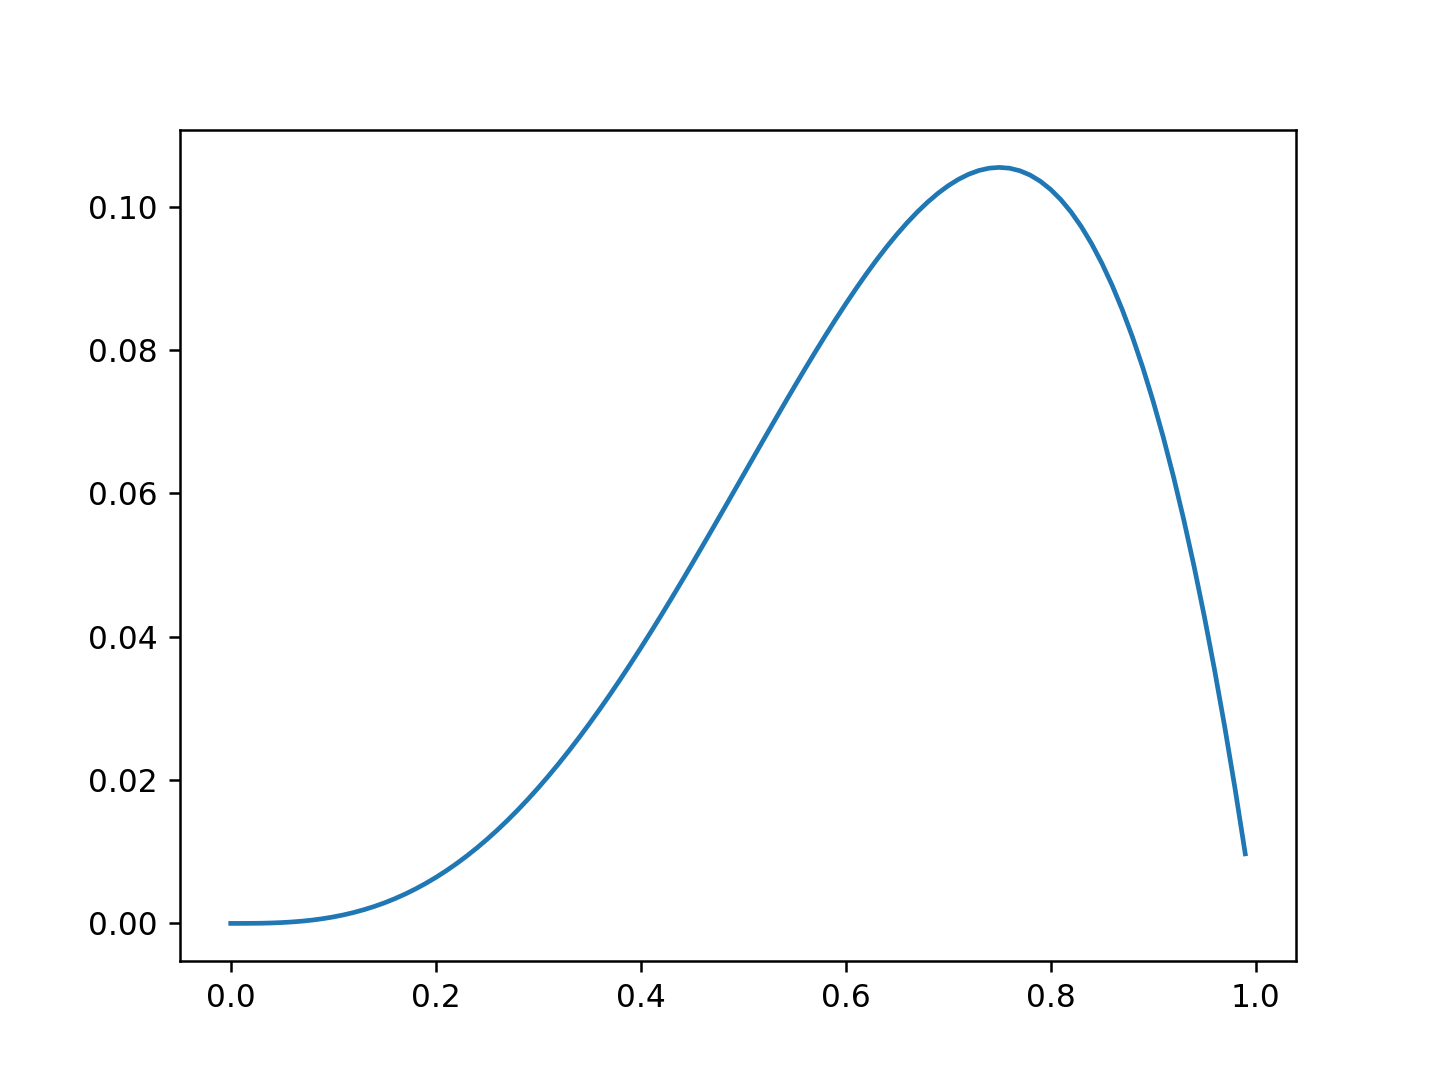

In [26]:
mu1,p1=plot_bern_mu(coins)

In [ ]:
#mu2,p2=plot_bern_mu(np.hstack((coins,coins2))
c2=np.hstack((coins,coins2))
mu2,p2=plot_bern_mu(c2)

<IPython.core.display.Javascript object>


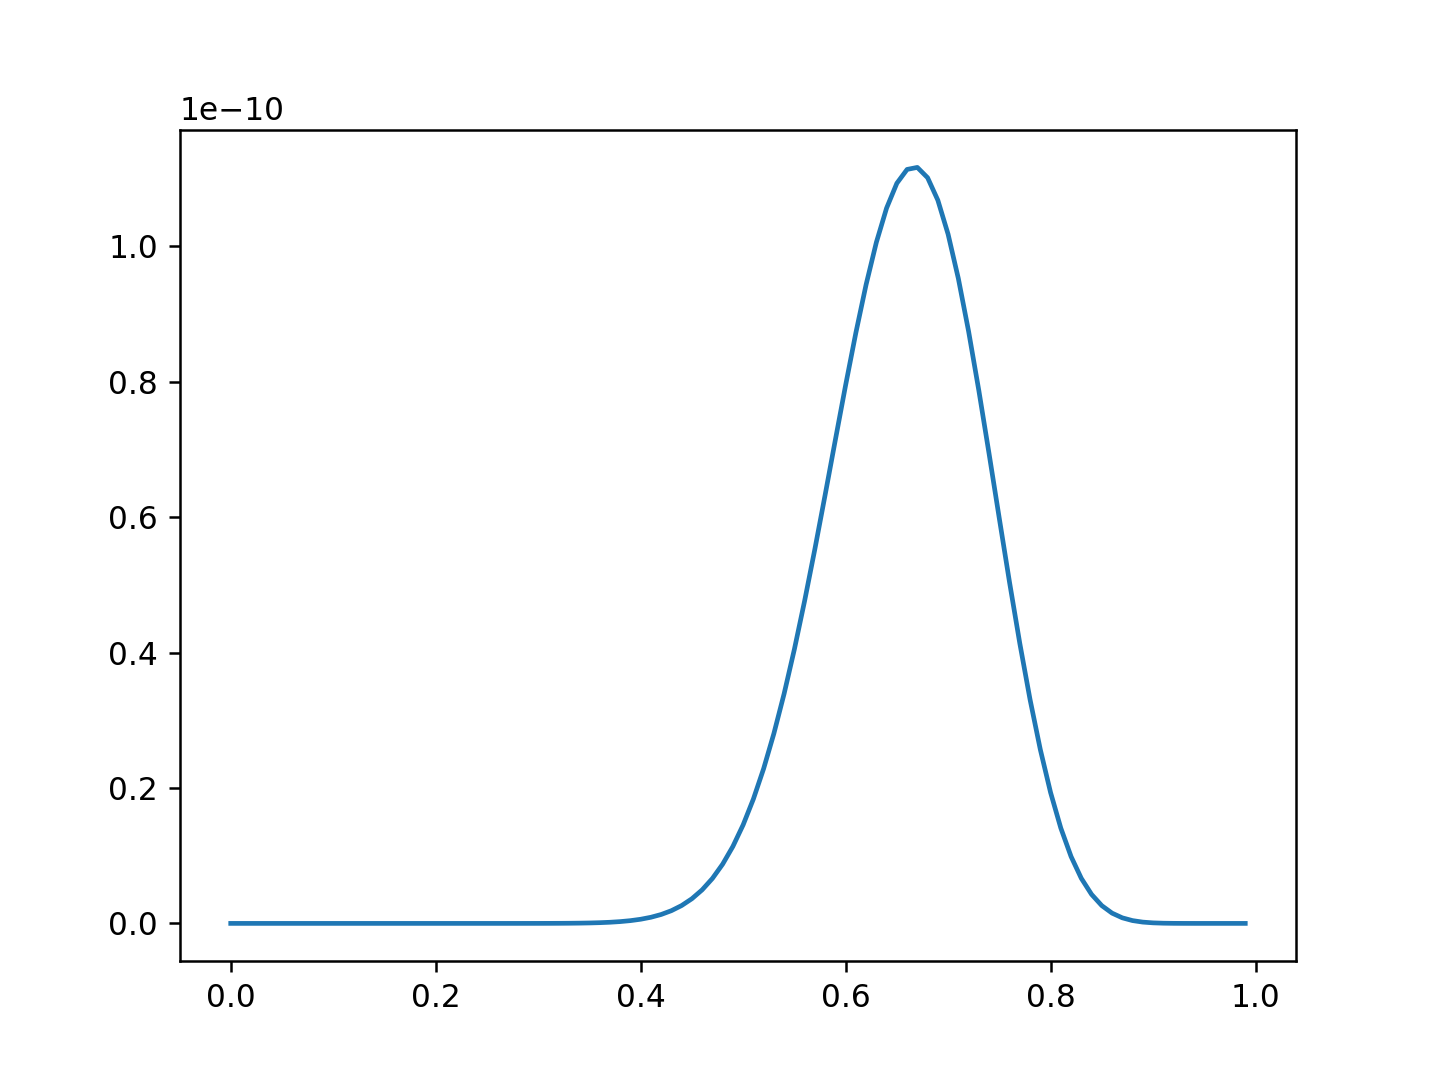

In [27]:
mu3,p3=plot_bern_mu(allcoins)

In [28]:
def log_bern_lh(mu, x):
    ################################
    #        YOUR CODE HERE        #
    ################################
    pass

In [29]:
x=np.arange(1,10,1)
y=np.arange(11,20,1)
z=x*y
z1=1-x
print(z1)

[ 0 -1 -2 -3 -4 -5 -6 -7 -8]


In [30]:
def log_bern_lh(mu, x): #(S13 V3?)
    ln_p=np.sum(x*np.log(mu)+(1-x)*np.log(1-mu))
    return ln_p

Now plot the log_bern_lh for different values of $\mu$:

In [32]:
def plot_ln_bern_mu(x):
    mu=np.arange(0,1,0.01)
    ln_p=np.zeros(len(mu));
    for i in np.arange(len(mu)):
        ln_p[i]=log_bern_lh(mu[i], x)
        
    plt.figure()
    plt.plot(mu,ln_p)
    plt.show()
    return mu, ln_p

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


<IPython.core.display.Javascript object>


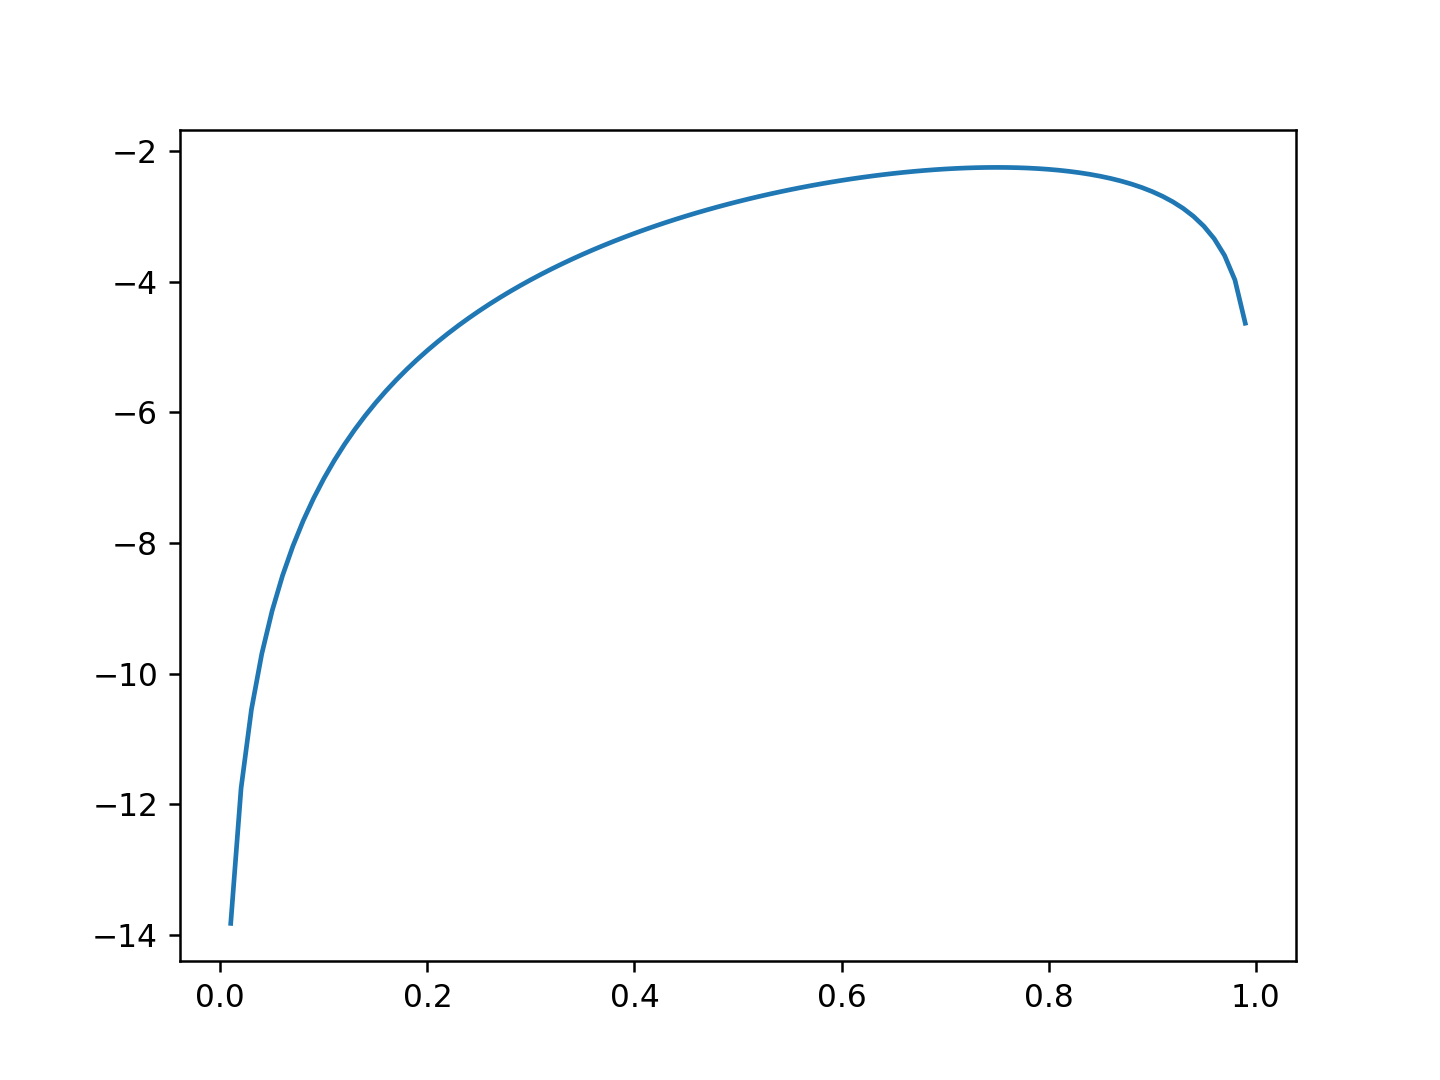

In [33]:
mu,ln_p=plot_ln_bern_mu(coins)